In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#read data using pandas
car_dataset = pd.read_csv("car data.csv")

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,NaN,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013.0,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017.0,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011.0,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014.0,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016.0,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015.0,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009.0,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017.0,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016.0,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
#check num of rows and columns
car_dataset.shape

(301, 9)

In [7]:
#get info about dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           288 non-null    float64
 2   Selling_Price  301 non-null    float64
 3   Present_Price  295 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [8]:
#check missing values
car_dataset.isnull().sum()

Car_Name          0
Year             13
Selling_Price     0
Present_Price     6
Kms_Driven        0
Fuel_Type         0
Seller_Type       0
Transmission      0
Owner             0
dtype: int64

In [9]:
# Display the number of missing values in each column
print("Number of missing values in each column:")
print(car_dataset.isnull().sum())

# Impute missing values with the most frequent value (mode) in place
car_dataset.fillna(car_dataset.mode().iloc[0], inplace=True)

# Display the DataFrame after imputing missing values with mode
print("\nDataFrame after imputing missing values with mode:")
print(car_dataset)


Number of missing values in each column:
Car_Name          0
Year             13
Selling_Price     0
Present_Price     6
Kms_Driven        0
Fuel_Type         0
Seller_Type       0
Transmission      0
Owner             0
dtype: int64

DataFrame after imputing missing values with mode:
    Car_Name    Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2015.0           3.35           5.59       27000    Petrol   
1        sx4  2013.0           4.75           9.54       43000    Diesel   
2       ciaz  2017.0           7.25           9.85        6900    Petrol   
3    wagon r  2011.0           2.85           4.15        5200    Petrol   
4      swift  2014.0           4.60           6.87       42450    Diesel   
..       ...     ...            ...            ...         ...       ...   
296     city  2016.0           9.50          11.60       33988    Diesel   
297     brio  2015.0           4.00           5.90       60000    Petrol   
298     city  2009.0          

In [10]:
# Convert 'Year' column to integer in place
car_dataset['Year'] = car_dataset['Year'].astype(int)

# Display the DataFrame after converting 'Year' to integer
print(car_dataset)




    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2015           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

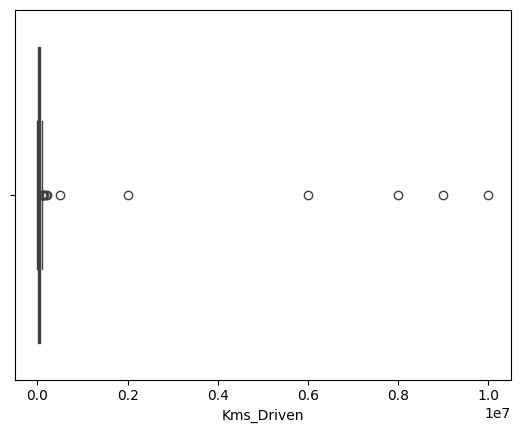

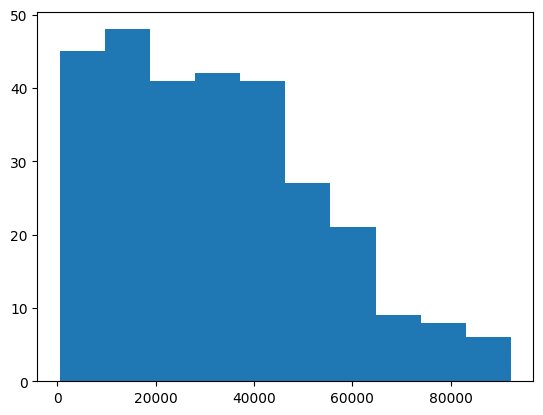

In [11]:
# Display the box plot using sns 
sns.boxplot(x=car_dataset['Kms_Driven'])
plt.show()

# Calculate the IQR "Interquartile range"
Q1 = car_dataset['Kms_Driven'].quantile(0.25)
Q3 = car_dataset['Kms_Driven'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filter to remove outliers
filtered_car_dataset = car_dataset[(car_dataset['Kms_Driven'] >= lower_bound) & (car_dataset['Kms_Driven'] <= upper_bound)]

# Display the histogram after removing outliers
plt.hist(filtered_car_dataset['Kms_Driven'], bins='auto')
plt.show()

In [12]:
#check distribution of categorical variables
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [13]:
#encode the categorical

#label encoding

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [14]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2015,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [15]:
#split

X=car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)

Y= car_dataset['Selling_Price']

In [16]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2015           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [17]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [18]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y , test_size=0.2,random_state=2)

In [19]:
#Model Training
#load linear regression
lin_reg_model = LinearRegression()

In [20]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [21]:
#Evaluation

training_data_prediction = lin_reg_model.predict(X_train)

In [22]:
#R sqaure error

error_score= metrics.r2_score(Y_train , training_data_prediction)
print("R squared error:", error_score)


R squared error: 0.8717995863517438


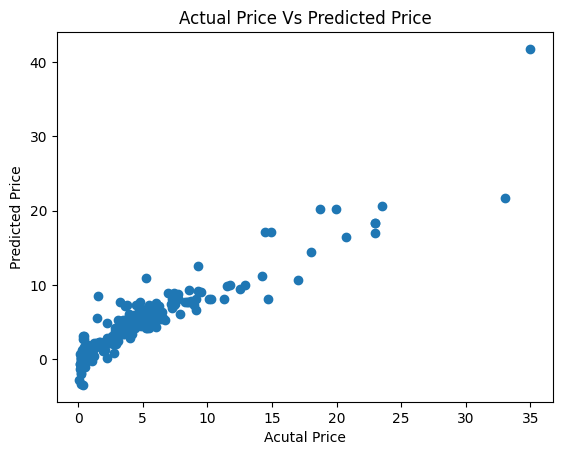

In [23]:
#visualize 
plt.scatter(Y_train, training_data_prediction)
plt.xlabel ("Acutal Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [24]:
#prediction on training data like Y_predict in slides
test_data_prediction = lin_reg_model.predict(X_test)


In [25]:
#R sqaure
error_score = metrics.r2_score (Y_test, test_data_prediction)
print ("R sqaured Error:", error_score)

R sqaured Error: 0.8432125997754766


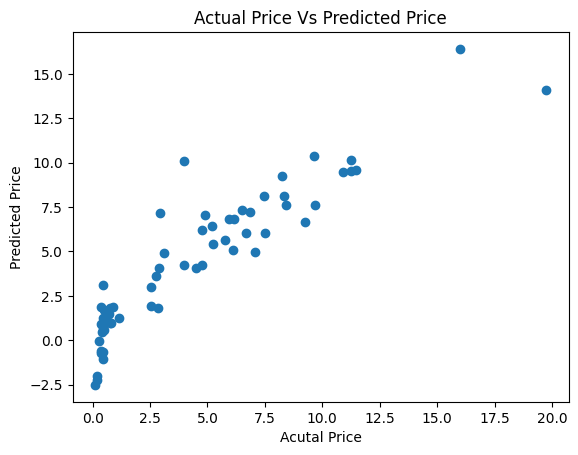

In [26]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel ("Acutal Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()

In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
#evaluate using training data
mae = mean_absolute_error(Y_train,training_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_train, training_data_prediction))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1.2134948079571113
Root Mean Squared Error: 1.8801633507289912


In [37]:
# Evaluate the model using MAE and RMSE using test data
mae = mean_absolute_error(Y_test,test_data_prediction)
rmse = np.sqrt(mean_squared_error(Y_test, test_data_prediction))
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1.2244799104377684
Root Mean Squared Error: 1.696948341941775


In [53]:
#prediction of output of new values 
import pandas as pd
#I created new data frame for new values 
new_values_df = pd.DataFrame([[2015, 8.0, 35000, 'Petrol', 'Dealer', 'Manual', 0]],
                              columns=['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])

# One-hot encode the categorical features
new_values_df_encoded = pd.get_dummies(new_values_df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])

# Extract the values as a NumPy array
new_values_encoded = new_values_df_encoded.values

# Use the trained model to predict the output for the new values
new_predictions = lin_reg_model.predict(new_values_encoded)
print("Predictions for new values:", new_predictions)



Predictions for new values: [5.73013585]


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
